## Lab 04 | Drzewa Decyzyjne - "Regresja przy użyciu drzew decyzyjnych, porównanie z regresją liniową"

In [1]:
# Imports

import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [2]:
# Load the datasets

df_sklearn = fetch_california_housing(data_home="data/", download_if_missing=True, as_frame=True)
df_gemini = pd.read_csv("data/sample_data.csv")

df_sklearn.data.shape, df_gemini.shape

((20640, 8), (44, 5))

In [3]:
df_sklearn.data.head(), df_gemini.head()

(   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 
    Longitude  
 0    -122.23  
 1    -122.22  
 2    -122.24  
 3    -122.25  
 4    -122.25  ,
    HourOfDay     CloudCover  Temperature_C Month  EnergyOutput_kWh
 0          6          Clear             15  June               5.2
 1          7          Clear             16  June              15.8
 2          8          Clear             18  June              28.1
 3          9  Partly Cloudy             20  June              35.5
 4         10  Partly Cloudy             22  June              40.2)

In [4]:
df_sklearn.data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [5]:
df_sklearn.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 20640\n\n:Number of Attributes: 8 numeric, predictive attributes and the target\n\n:Attribute Information:\n    - MedInc        median income in block group\n    - HouseAge      median house age in block group\n    - AveRooms      average number of rooms per household\n    - AveBedrms     average number of bedrooms per household\n    - Population    block group population\n    - AveOccup      average number of household members\n    - Latitude      block group latitude\n    - Longitude     block group longitude\n\n:Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000).\n\nThis dataset was derived from the 1990 U.S

In [6]:
df_sklearn.target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [7]:
df_sklearn.target.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

### Dataset EDA

In [8]:
# EDA of the California Housing set

print(f"California Housing shape: {df_sklearn.data.shape}")
print(f"California Housing isNa:\n{df_sklearn.data.isna().sum()}")
print(f"California Housing isNull:\n{df_sklearn.data.isnull().sum()}")
print(f"California Housing types:\n{df_sklearn.data.dtypes}")
print(f"California Housing info:\n{df_sklearn.data.info()}")
print(f"California Housing numerical values distribution:\n{df_sklearn.data.describe()}")

California Housing shape: (20640, 8)
California Housing isNa:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64
California Housing isNull:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64
California Housing types:
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    2

<Axes: >

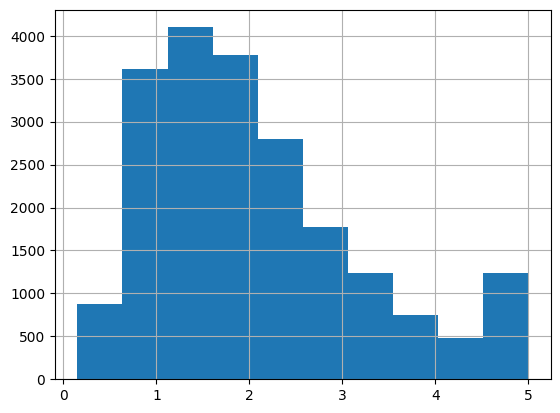

In [9]:
sklearn_target_hist = df_sklearn.target.hist()
sklearn_target_hist

In [10]:
# EDA of the Gemini-generated set

print(f"Gemini gen. shape: {df_gemini.shape}")
print(f"Gemini gen. isNa:\n{df_gemini.isna().sum()}")
print(f"Gemini gen. isNull:\n{df_gemini.isnull().sum()}")
print(f"Gemini gen. types:\n{df_gemini.dtypes}")
print(f"Gemini gen. numerical values distribution:\n{df_gemini.describe()}")

Gemini gen. shape: (44, 5)
Gemini gen. isNa:
HourOfDay           0
CloudCover          0
Temperature_C       0
Month               0
EnergyOutput_kWh    0
dtype: int64
Gemini gen. isNull:
HourOfDay           0
CloudCover          0
Temperature_C       0
Month               0
EnergyOutput_kWh    0
dtype: int64
Gemini gen. types:
HourOfDay             int64
CloudCover           object
Temperature_C         int64
Month                object
EnergyOutput_kWh    float64
dtype: object
Gemini gen. numerical values distribution:
       HourOfDay  Temperature_C  EnergyOutput_kWh
count  44.000000      44.000000         44.000000
mean   12.454545      22.409091         38.102273
std     3.316306       3.384769         21.149407
min     6.000000      15.000000          5.200000
25%    10.000000      20.000000         18.800000
50%    12.500000      22.000000         37.950000
75%    15.000000      25.000000         55.375000
max    18.000000      28.000000         75.500000


![Gemini Dataset Description](imgs/gemini_dataset_description.png)

<Axes: >

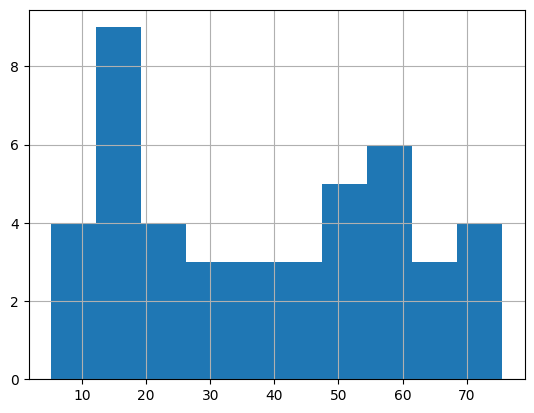

In [11]:
gemini_target_hist = df_gemini["EnergyOutput_kWh"].hist()
gemini_target_hist

### Data processing

In [12]:
# One-hot encode the non-numerical values in the Gemini generated set

categorical_columns = ["CloudCover", "Month"]
df_gemini = pd.get_dummies(df_gemini, categorical_columns, drop_first=False)
df_gemini.head()

,HourOfDay,Temperature_C,EnergyOutput_kWh,CloudCover_Clear,CloudCover_Overcast,CloudCover_Partly Cloudy,Month_August,Month_July,Month_June,Month_September
0,6,15,5.2,True,False,False,False,False,True,False
1,7,16,15.8,True,False,False,False,False,True,False
2,8,18,28.1,True,False,False,False,False,True,False
3,9,20,35.5,False,False,True,False,False,True,False
4,10,22,40.2,False,False,True,False,False,True,False


In [13]:
# Reorder the columns

df_gemini = df_gemini[["HourOfDay", "Temperature_C", "CloudCover_Clear",
                       "CloudCover_Overcast", "CloudCover_Partly Cloudy", "Month_June",
                       "Month_July", "Month_August", "Month_September", "EnergyOutput_kWh"]]
df_gemini.head()

,HourOfDay,Temperature_C,CloudCover_Clear,CloudCover_Overcast,CloudCover_Partly Cloudy,Month_June,Month_July,Month_August,Month_September,EnergyOutput_kWh
0,6,15,True,False,False,True,False,False,False,5.2
1,7,16,True,False,False,True,False,False,False,15.8
2,8,18,True,False,False,True,False,False,False,28.1
3,9,20,False,False,True,True,False,False,False,35.5
4,10,22,False,False,True,True,False,False,False,40.2


In [14]:
len(df_gemini.columns)

10

### Data splitting

In [15]:
X_sklearn = df_sklearn.data
y_sklearn = df_sklearn.target

X_gemini = df_gemini.iloc[:, :-1]
y_gemini = df_gemini.iloc[:, -1]

In [16]:
X_train_sklearn, X_test_sklearn, y_train_sklearn, y_test_sklearn = train_test_split(X_sklearn, y_sklearn, test_size=0.2, random_state=42)
X_train_gemini, X_test_gemini, y_train_gemini, y_test_gemini = train_test_split(X_gemini, y_gemini, test_size=0.2, random_state=42)

X_train_sklearn.shape, X_train_gemini.shape

((16512, 8), (35, 9))

### Training the default Tree model

In [17]:
default_param_tree = DecisionTreeRegressor() # Initialize with default params

In [18]:
# Train the model and make predictions (California Housing set)

default_param_tree.fit(X_train_sklearn, y_train_sklearn)
y_pred_tree_sklearn = default_param_tree.predict(X_test_sklearn)

mse_tree_sklearn = mean_squared_error(y_test_sklearn, y_pred_tree_sklearn)
mae_tree_sklearn = mean_absolute_error(y_test_sklearn, y_pred_tree_sklearn)
r2_tree_sklearn = r2_score(y_test_sklearn, y_pred_tree_sklearn)

print("Metrics for the California Housing set:")
print(f"Default tree MSE: {mse_tree_sklearn}")
print(f"Default tree MAE: {mae_tree_sklearn}")
print(f"Default tree R2 Score: {r2_tree_sklearn}")

Metrics for the California Housing set:
Default tree MSE: 0.48714061277059106
Default tree MAE: 0.4525633963178295
Default tree R2 Score: 0.6282529951645086


In [19]:
# Train the model and make predictions (Gemini generated set)

default_param_tree.fit(X_train_gemini, y_train_gemini)
y_pred_tree_gemini = default_param_tree.predict(X_test_gemini)

mse_tree_gemini = mean_squared_error(y_test_gemini, y_pred_tree_gemini)
mae_tree_gemini = mean_absolute_error(y_test_gemini, y_pred_tree_gemini)
r2_tree_gemini = r2_score(y_test_gemini, y_pred_tree_gemini)

print("Metrics for the Gemini Generated set:")
print(f"Default tree MSE: {mse_tree_gemini}")
print(f"Default tree MAE: {mae_tree_gemini}")
print(f"Default tree R2 Score: {r2_tree_gemini}")

Metrics for the Gemini Generated set:
Default tree MSE: 119.37333333333338
Default tree MAE: 9.511111111111113
Default tree R2 Score: 0.5557926072934753


#### Obserwacje wyników

- Wynik modelu drzewa o domyślnych parametrach wyniósł ok. ~63% dokładności metryki R2,
- Błędy MSE oraz MAE wahały się w granicach: ~48% - ~52% (dla MSE) oraz ~42% - ~51% (dla MAE).
- Dla zbioru danych, który został wygenerowany przez Gemini, metryki wyglądają gorzej.
- R2 Score dla zbioru danych od Gemini wyniósł w najlepszym przypadku ~55%, ale często przyjmował również wartości poniżej 0.
- Pozostałe metryki, MSE oraz MAE pokazują znacznie większe wartości błędów, niż w przypadku datasetu California Housing.
- Złe wyniki dla zbioru danych Gemini mogą wywodzić się z liniowej zależności pomiędzy kolumną temperatury oraz kolumną wytwarzanej energii. Mogą być także spowodowane "zakłócaniem" predykcji przez kolumny zachmurzenia oraz miesiąca, z których model możliwie nie jest w stanie wyciągnąć wniosków przy małej ilości danych w zbiorze.

### Training the Linear model

In [20]:
default_param_linear = LinearRegression()

In [21]:
# Train the model and make predictions (California Housing set)

default_param_linear.fit(X_train_sklearn, y_train_sklearn)
y_pred_linear_sklearn = default_param_linear.predict(X_test_sklearn)

mse_linear_sklearn = mean_squared_error(y_test_sklearn, y_pred_linear_sklearn)
mae_linear_sklearn = mean_absolute_error(y_test_sklearn, y_pred_linear_sklearn)
r2_linear_sklearn = r2_score(y_test_sklearn, y_pred_linear_sklearn)

print("Metrics for the California Housing set:")
print(f"Default linear MSE: {mse_linear_sklearn}")
print(f"Default linear MAE: {mae_linear_sklearn}")
print(f"Default linear R2 Score: {r2_linear_sklearn}")

Metrics for the California Housing set:
Default linear MSE: 0.5558915986952444
Default linear MAE: 0.5332001304956553
Default linear R2 Score: 0.5757877060324508


In [22]:
# Train the model and make predictions (Gemini gnerated set)

default_param_linear.fit(X_train_gemini, y_train_gemini)
y_pred_linear_gemini = default_param_linear.predict(X_test_gemini)

mse_linear_gemini = mean_squared_error(y_test_gemini, y_pred_linear_gemini)
mae_linear_gemini = mean_absolute_error(y_test_gemini, y_pred_linear_gemini)
r2_linear_gemini = r2_score(y_test_gemini, y_pred_linear_gemini)

print("Metrics for the Gemini Generated set:")
print(f"Default linear MSE: {mse_linear_gemini}")
print(f"Default linear MAE: {mae_linear_gemini}")
print(f"Default linear R2 Score: {r2_linear_gemini}")

Metrics for the Gemini Generated set:
Default linear MSE: 16.000899441223932
Default linear MAE: 2.9569732718767234
Default linear R2 Score: 0.9404580769986706


#### Obserwacje wyników oraz porównanie z modelem drzewa

- Model liniowy poradził sobie lepiej z datasetem wygenerowanym przez Gemini. Otrzymał w nim ~94% dla metryki R2 oraz znacznie mniejsze wartości dla metryk błędów.
- Dla zbioru danych California Housing, wartości otrzymane przez model liniowy były nieco gorsze od metryk modelu drzewa -- R2 Score na poziomie ~33% oraz 0.55 MSE i 0.53 MAE.
- Różnice w wynikach mogą być spowodowane liniową zależnością pomiędzy kolumną *Temperature_C* oraz *EnergyOutput_kWh* -- model liniowy może lepiej dopasować wzrost temperatury do wzrostu wytwarzanej energii.
- Model drzewa może w tym przypadku próbować wywnioskować zależności pomiędzy wytwarzaną energią, a np. zachmurzeniem, które wpływa w pewnym stopniu na wartość w kolumnie z temperaturą.

### GridSearchCV tuning

In [23]:
# Define the GridSearchCV params (estimator, param_grid, etc.)

estimator = default_param_tree # Use the previously defined dafault param tree model

param_grid = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5, 10]
}

cv = 5

In [24]:
grid = GridSearchCV(estimator, param_grid, cv=cv)

In [25]:
grid.fit(X_train_sklearn, y_train_sklearn)
print("Best found params:", grid.best_params_)
best_tree_model = grid

Best found params: {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 5}


In [26]:
y_pred_best_tree_sklearn = best_tree_model.predict(X_test_sklearn)

mse_best_tree_sklearn = mean_squared_error(y_test_sklearn, y_pred_best_tree_sklearn)
mae_best_tree_sklearn = mean_absolute_error(y_test_sklearn, y_pred_best_tree_sklearn)
r2_best_tree_sklearn = r2_score(y_test_sklearn, y_pred_best_tree_sklearn)

print("Metrics for the California Housing set:")
print(f"Best tree MSE: {mse_best_tree_sklearn}")
print(f"Best tree MAE: {mae_best_tree_sklearn}")
print(f"Best tree R2 Score: {r2_best_tree_sklearn}")

Metrics for the California Housing set:
Best tree MSE: 0.36264849292446966
Best tree MAE: 0.40427261331930975
Best tree R2 Score: 0.7232554882130837


In [27]:
# Train the best model on the Gremini set

grid.fit(X_train_gemini, y_train_gemini)
print("Best found params:", grid.best_params_)

y_pred_best_tree_gemini = grid.predict(X_test_gemini)

mse_best_tree_gemini = mean_squared_error(y_test_gemini, y_pred_best_tree_gemini)
mae_best_tree_gemini = mean_absolute_error(y_test_gemini, y_pred_best_tree_gemini)
r2_best_tree_gemini = r2_score(y_test_gemini, y_pred_best_tree_gemini)

print("Metrics for the Gemini Generated set:")
print(f"Best tree MSE: {mse_best_tree_gemini}")
print(f"Best tree MAE: {mae_best_tree_gemini}")
print(f"Best tree R2 Score: {r2_best_tree_gemini}")

Best found params: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Metrics for the Gemini Generated set:
Best tree MSE: 263.08804444444445
Best tree MAE: 11.76920634920635
Best tree R2 Score: 0.021007028859670762


#### Porównanie z modelem o podstawowych parametrach

- Stosując GridSearch, udało się podnieść wszystkie metryki modelu dla datasetu California Housing.
- Metryka R2 wzrosła o maksymalnie ~10%, podczas gdy MSE oraz MAE zmalały nawet o 12%.
- Dla wygenerowanego datasetu, GridSearch nie przyniósł dobrych rezultatów.
- Metryka R2 często spadała poniżej 0, a błędy wzrosły nawet do poziomu 300% początkowej wartości.